# Mehrkörperprobleme

Wir betrachten das Mehrkörpersystem für $N$ Körper.

Jeder Körper $i$ ist durch eine Masse $m_i \in \mathbb{R}$, eine Position $x_i \in \mathbb{R}^3$ und eine Geschwindigkeit $v_i \in \mathbb{R}^3$ definiert. Wir nehmen an, dass die Bewegung der Körper den Differentialgleichungen folgt:
\begin{align*}
  {x}_i'(t) &= v_i(t), & \quad i = 1,..,N, \\
  {v}_i'(t) &= G \sum_{i\neq j} \frac{m_j}{\Vert x_j(t) - x_i(t) \Vert_2^3} ( x_i(t) - x_j(t) ) & \quad i = 1,..,N. 
\end{align*}
$G$ ist die Gravitationskonstante.

* Die erste Gleichung beschreibt die Geschwindigkeit und 
* die zweite Gleichung beschreibt die Beschleunigung 
* wobei die Beschleunigung durch die Gravitationskraft zwischen den Körpern gegeben ist.
* Diese Gravitationskräfte
    * sind paarweise,
    * wirken zwischen allen Körpern und
    * skalieren mit dem Inversen des Abstandquadrats zwischen den Körpern.

## Aufgabe:

Formulieren Sie das Mehrkörperproblem als System erster Ordnung von Differentialgleichungen und bestimmen Sie $y(t)$ und $f(t,y)$, die das gleiche Problem beschreiben!

---

## Zwei Beispielprobleme:

### Beispiel 1: Tom und Jerry (2 Körper)

| Planet | Masse | Anfangspos. $x_i^0$ | Anfangsgeschw. $v_i^0$ | 
|---|---|---|---|
| Tom | $m_1 = 200000$ | (0,1,0) | (-1,0,0.5) |
| Jerry | $m_1 = 100000$ | (0,-1,0) | (1,0,-0.5) |
|

In [1]:
tom = {"name":"Tom","mass":1e5,"position":[0.0,-10.0,0.2],"velocity": [ 11,0.0, 5 ]}
jerry = {"name":"Jerry","mass":1e5,"position":[0.0,-10.0,0.1],"velocity": [ -11,0.0, 5 ]}

### Beispiel 2: Das äußere Sonnensystem (6 Körper)
Für das äußere Sonnensystem betrachten wir die folgenden Körper mit ihren Massen $m_i$ und Anfangspositionen $x_i^0$ und Geschwindigkeiten $v_i^0$:

| Planet | Masse | Anfangspos. $x_i^0$ | Anfangsgeschw. $v_i^0$ | 
|---|---|---|---| 
| | | -3.5023653 | 0.00565429 |
| Jupiter | $0.00095478610403$ | -3.8169847 | -0.00412490 | 
| | | -1.5507963 | -0.00190589 | 
|---|---|---|---| 
| | | 9.0755314 | 0.00168318 | 
| Saturn | $0.000285583733151$ | -3.0458353 | 0.00483525 | 
| | | -1.6483708 | 0.00192462 |
|---|---|---|---| 
| | | 8.3101420 | 0.00354178 |
| Uranus | $0.0000437273164546$ | -16.2901086 | 0.00137102 |
| | | -7.2521278 | 0.00055029 |
|---|---|---|---| 
| | | 11.4707666 | 0.00288930 |
| Neptun | $0.0000051779138449$ | -25.7294829 | 0.00114527 |
| | | -10.8169456 | 0.00039677 |
|---|---|---|---| 
| | | -15.5387357 | 0.00276725 |
| Pluto | $1.0/(1.3 \times 10^8)$ | -25.2225594 | -0.00170702 |
| | | -3.1902382 | -0.00136504 | 
|---|---|---|---| 
| Sonne | $1.00000597682$ | (0,0,0) | (0,0,0) |

In [2]:
jupiter = {"name":"Jupiter","mass":0.000954786104043,"position":[-3.5023653,-3.8169847,-1.5507963],"velocity": [0.00565429,-0.00412490,-0.00190589]}
saturn = {"name":"Saturn","mass":0.000285583733151,"position":[9.0755314,-3.0458353,-1.6483708],"velocity": [0.00168318,0.00483525,0.00192462]}
uranus = {"name":"Uranus","mass":0.0000437273164546,"position":[8.3101420,-16.2901086,-7.2521278],"velocity": [0.00354178,0.00137102,0.00055029]}
neptune = {"name":"Neptune","mass":0.0000051779138449,"position":[11.4707666,-25.7294829,-10.8169456],"velocity": [0.00288930,0.00114527,0.00039677]}
pluto = {"name":"Pluto","mass":1.0/1.3e8,"position":[-15.5387357,-25.2225594,-3.1902382],"velocity": [0.00276725,-0.00170702,-0.00136504]}
sun = {"name":"Sun","mass":1.00000597682,"position":[0,0,0],"velocity": [0,0,0]}
G = 2.95912208286e-4


---

In [3]:
from numpy import array, zeros, dstack
from numpy.linalg import norm

Das Mehrkörperproblem als Klasse:

In [4]:
class ManyBodySystem:

    def __init__(self, m, labels, G):
        self.m = m
        self.N = len(m)
        self.G = G
        self.labels = labels
        
    def calc_acceleration(self, x_in):
        x = x_in.reshape([self.N,3])
        a = zeros([self.N,3])
        for i in range(self.N):
            for j in range(self.N):
                if j==i:
                    continue
                diff = x[i,:] - x[j,:]
                diffnorm = norm(diff)
                a[i,:] -= self.G * self.m[j] / diffnorm**3 * diff
        return a.flatten()


Initialer Zustandsvektor $y_0$ für die beiden Beispiele:

In [5]:
tj_bodies = [tom,jerry]
tj = ManyBodySystem([b["mass"] for b in tj_bodies], ["tom","jerry"], G)
tj_x0 = array([b["position"] for b in tj_bodies]).flatten()
tj_v0 = array([b["velocity"] for b in tj_bodies]).flatten()
tj_y0 = array([tj_x0,tj_v0]).flatten()
print(tj_y0)

os_bodies = [jupiter,saturn,uranus,neptune,pluto,sun]
os = ManyBodySystem([b["mass"] for b in os_bodies], ["jupiter","saturn","uranus","neptune","pluto","sun"],G)
os_x0 = array([b["position"] for b in os_bodies])
os_v0 = array([b["velocity"] for b in os_bodies])
os_y0 = array([os_x0,os_v0]).flatten()

[  0.  -10.    0.2   0.  -10.    0.1  11.    0.    5.  -11.    0.    5. ]


Das explizite Euler-Verfahren für das Mehrkörperproblem ist gegeben durch die Aktualisierungsregel:
\begin{align*}
  y_{n+1} = y_n + \Delta t f(t_n, y_n).
\end{align*}
Wobei hier mit $y_n = (x_1^n, x_2^n, x_3^n, \ldots, x_N^n, v_1^n, v_2^n, v_3^n, \ldots, v_N^n)$ gilt:
\begin{align*}
  x_i^{n+1} &= x_i^n + \Delta t v_i^n, & \quad i = 1,..,N, \\
  v_i^{n+1} &= v_i^n + \Delta t G \sum_{i\neq j} \frac{m_j}{\Vert x_i^n - x_j^n \Vert_2^3} ( x_i^n - x_j^n ) & \quad i = 1,..,N.
\end{align*}
Der letzte Ausdruck wird von der ManyBodyProblem-Klasse zur Verfügung gestellt, sodass die Umsetzung einfach ist:

In [6]:
def ManyBodyEulerStep(mbs, t, y, dt):
    N = mbs.N
    x = y[:N*3]
    v = y[N*3:]
    a = mbs.calc_acceleration(x)
    x += v*dt
    v += a*dt
    return array([x,v]).flatten()

Ein symplektisches Euler-Verfahren ist noch nicht implementiert. Wir haben als Platzhalter Folgendes:

In [7]:
def ManyBodySymplecticEulerStep(mbs, t, y, dt):
    N = mbs.N
    x = y[:N*3]
    v = y[N*3:]
    x += v*dt
    a = mbs.calc_acceleration(x)
    v += a*dt
    return array([x,v]).flatten()
    

Die Simulation des Mehrkörperproblems erfolgt dann mit folgendem Code:

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def SimulateManyBodySystem(mbs, method = ManyBodyEulerStep, start_t=0, end_t=10, start_y0=None, dt=2):
    t = start_t
    y = start_y0.copy()
    t_values = [t]
    poshistory = y.copy()[:mbs.N*3].reshape((mbs.N,3,1))
    while t < end_t+1e-12:
        y = method(mbs, t, y, dt)
        #print(y[:mbs.N*3])
        poshistory = dstack([poshistory,y[:mbs.N*3].reshape([mbs.N,3,1])])
        t += dt
        t_values.append(t)

    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d') 
    N = mbs.N
    for i in range(N):
        ax.plot( poshistory[i,0,:], poshistory[i,1,:], poshistory[i,2,:], '-o'+colors[i], label=mbs.labels[i])
    ax.legend()
    plt.show()

#### Simulationsläufe:

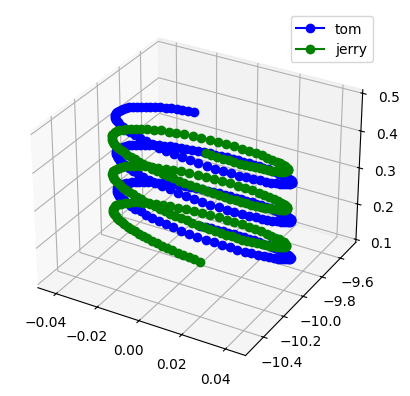

In [9]:
%matplotlib inline 
# vs 'widget' vs. 'notebook'
#SimulateManyBodySystem(tj, method=ManyBodyEulerStep, start_y0=tj_y0, dt=0.002, end_t=2)
SimulateManyBodySystem(tj, method=ManyBodySymplecticEulerStep, start_y0=tj_y0, 
                       dt=0.00025, end_t=0.06)

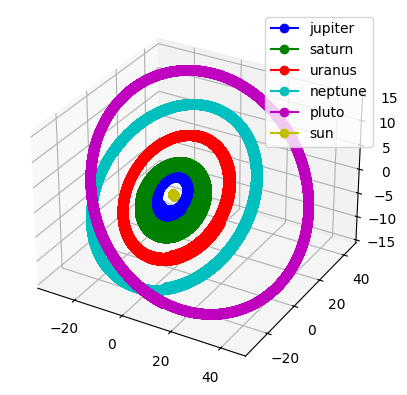

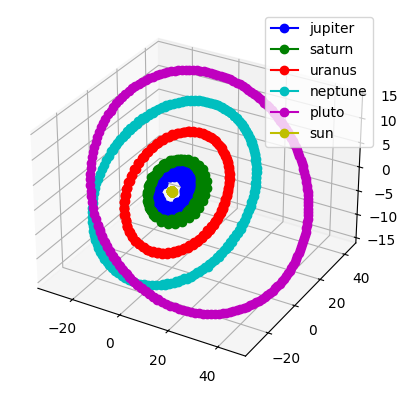

In [10]:
%matplotlib inline  
# vs 'widget' vs. 'notebook'
SimulateManyBodySystem(os, start_y0=os_y0, dt=5, end_t=100000)
SimulateManyBodySystem(os, method=ManyBodySymplecticEulerStep, start_y0=os_y0, dt=500, end_t=100000)

### Aufgaben:

* Implementieren Sie ein symplektisches Euler-Verfahren zur Lösung des Mehrkörperproblems für beide Beispiele.
* Fixieren Sie beim Tom-und-Jerry-Setup einen Körper, indem Sie seine Masse sehr groß setzen, und lösen Sie das Zweikörperproblem. Was beobachten Sie?
* Erstellen Sie ein Tom-und-Jerry-Beispiel mit zwei Körpern, die sich auf Kreisbahnen umeinander bewegen.
* Vergleichen Sie das symplektische Euler-Verfahren mit dem expliziten Euler-Verfahren für beide Probleme. Was beobachten Sie?